In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-vs-academic-performance


In [2]:
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.shape

(1000, 16)

In [5]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [6]:
sns.set_style("whitegrid")

In [7]:
df.isna().sum().sum()

np.int64(91)

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [13]:
df.describe(include="object").columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [14]:
categorical_cols = ["gender","part_time_job","diet_quality","parental_education_level","internet_quality","extracurricular_participation"]

In [15]:
for col in categorical_cols:
    print(f"Value counts for {col}: \n {df[col].value_counts()}")
    print(df[col].value_counts())
    print()

Value counts for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
gender
Male      440
Female    433
Other      36
Name: count, dtype: int64

Value counts for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
part_time_job
No     713
Yes    196
Name: count, dtype: int64

Value counts for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64

Value counts for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

Value counts for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64

Val

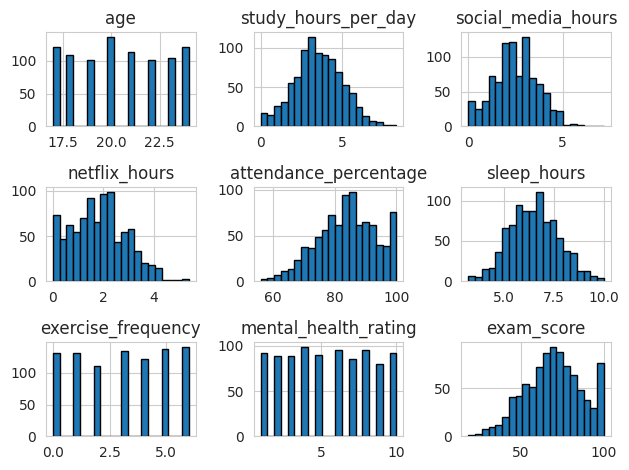

In [16]:
df.hist(bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

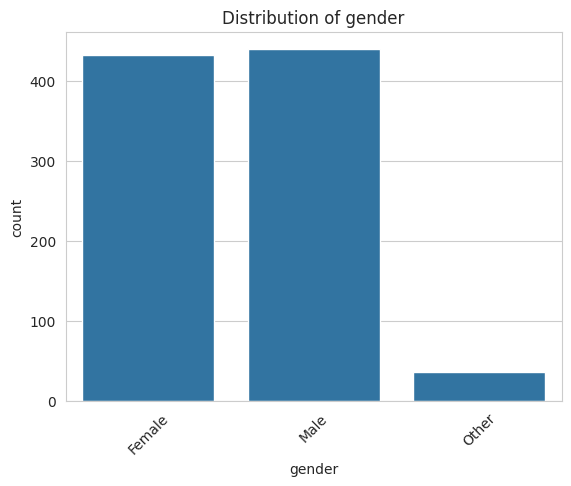

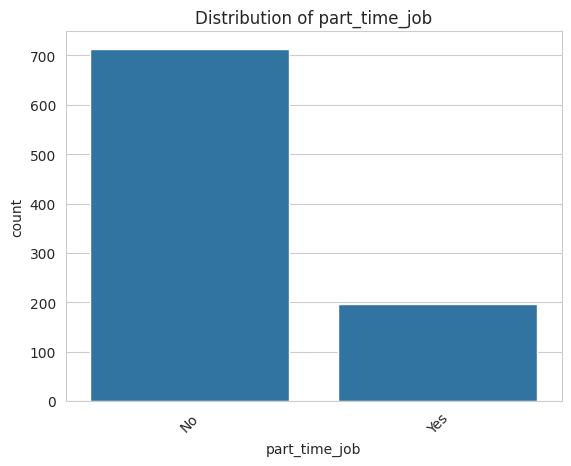

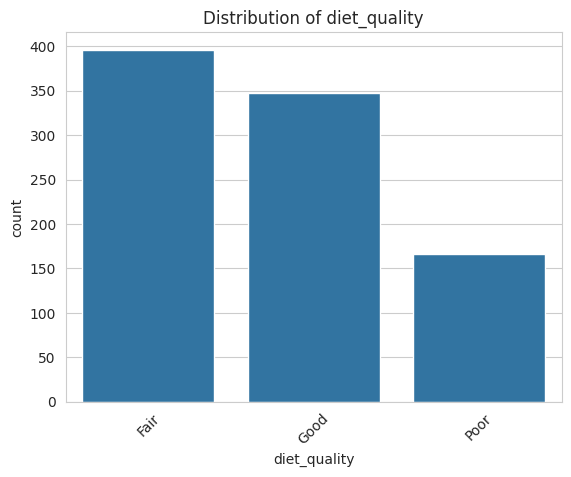

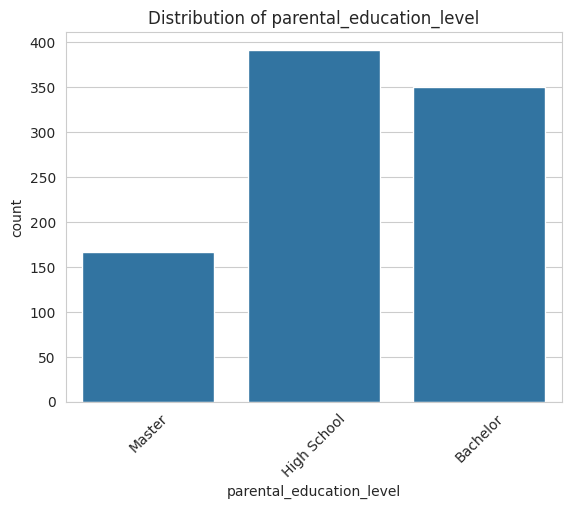

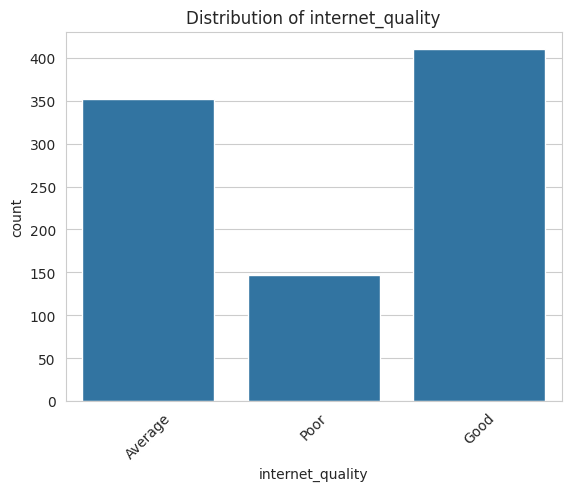

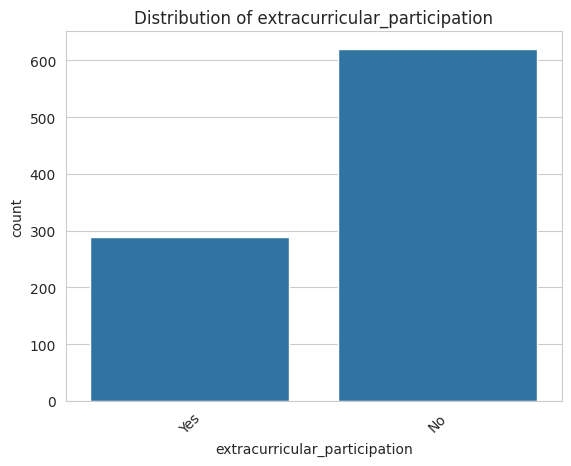

In [17]:
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)
    plt.show()

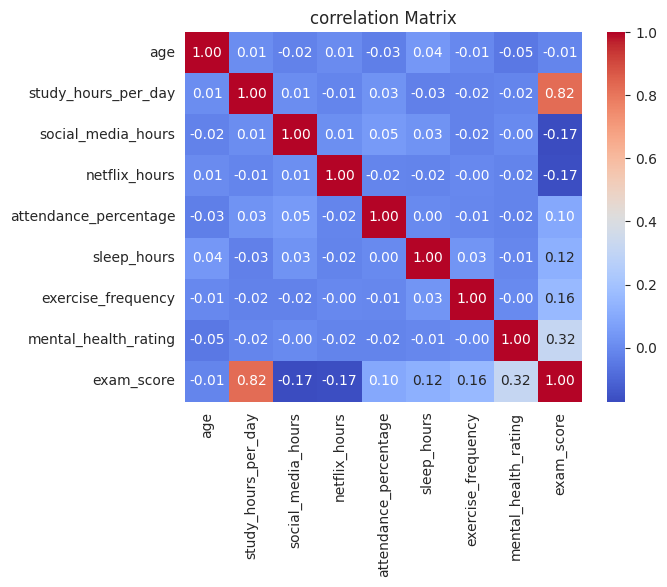

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation Matrix")
plt.show()

In [19]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [20]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

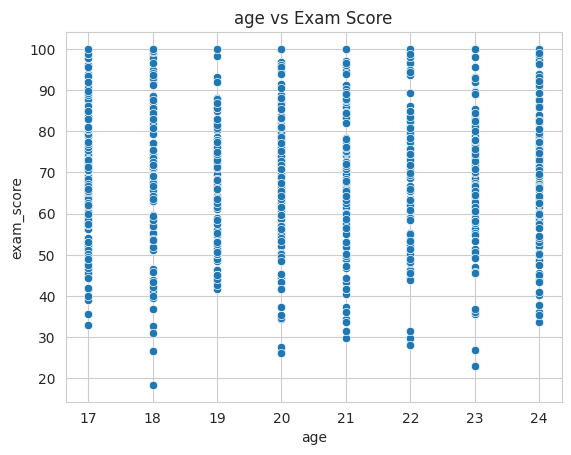

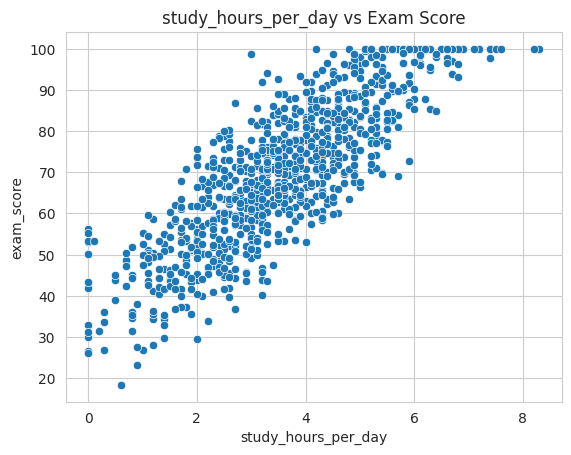

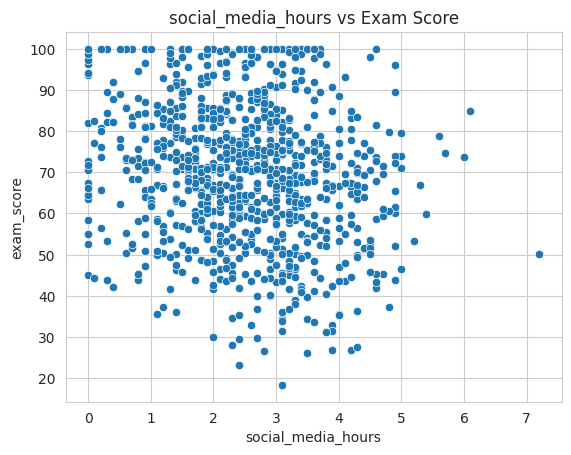

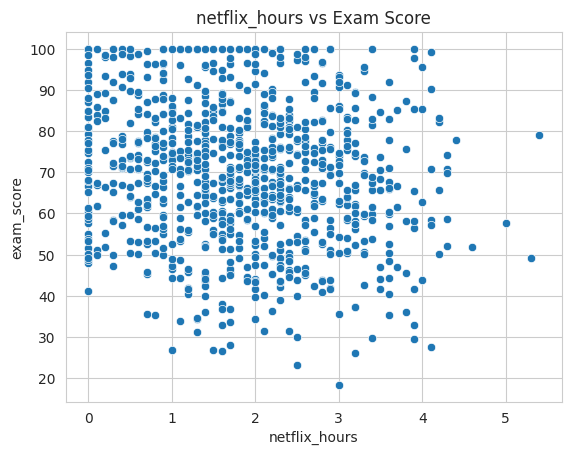

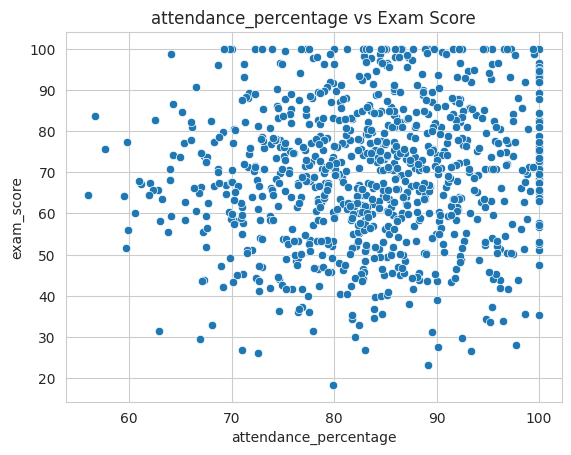

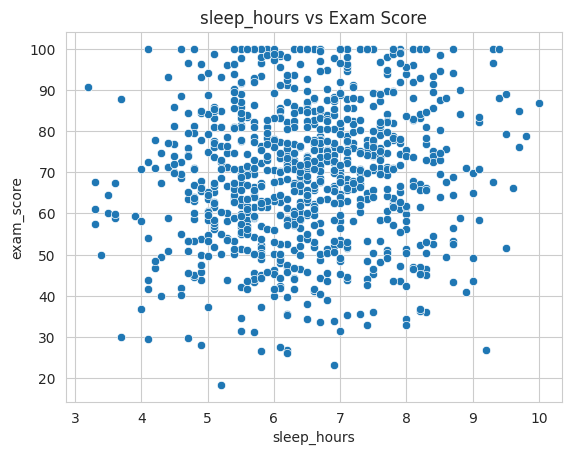

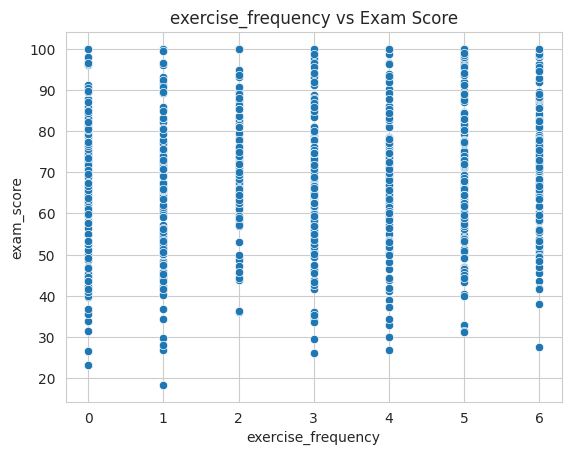

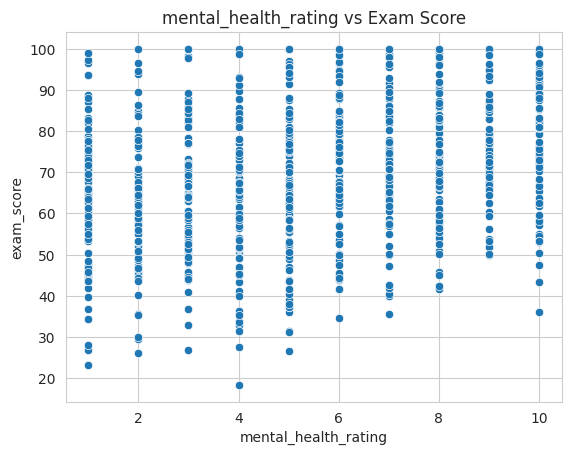

In [21]:
for features in num_features:
  sns.scatterplot(data = df, x = features, y = "exam_score")
  plt.title(f"{features} vs Exam Score")
  plt.show()

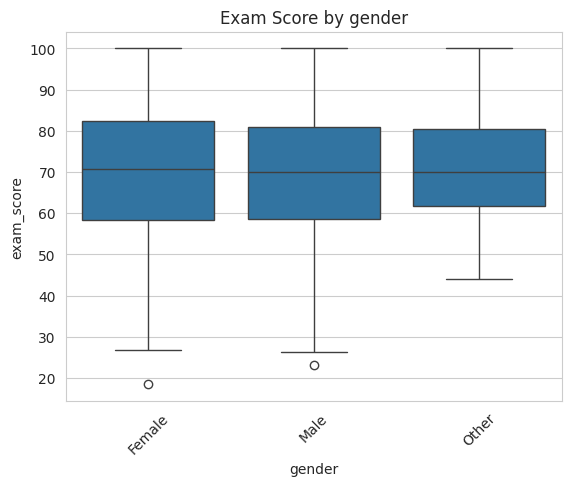

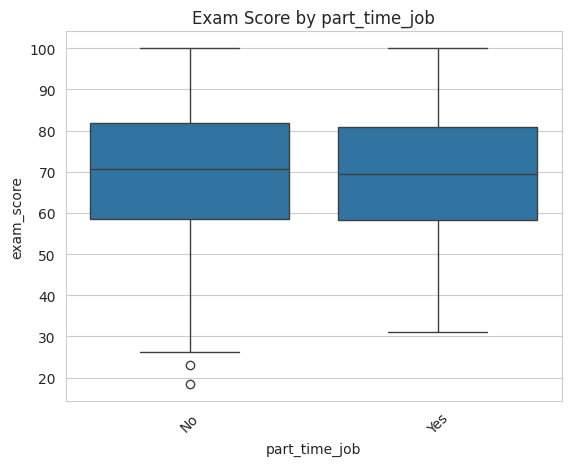

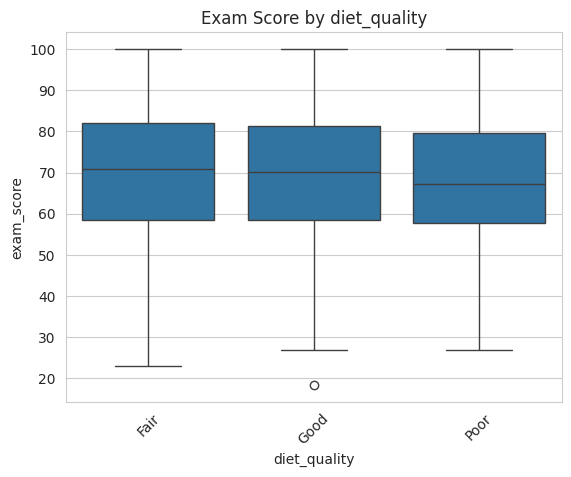

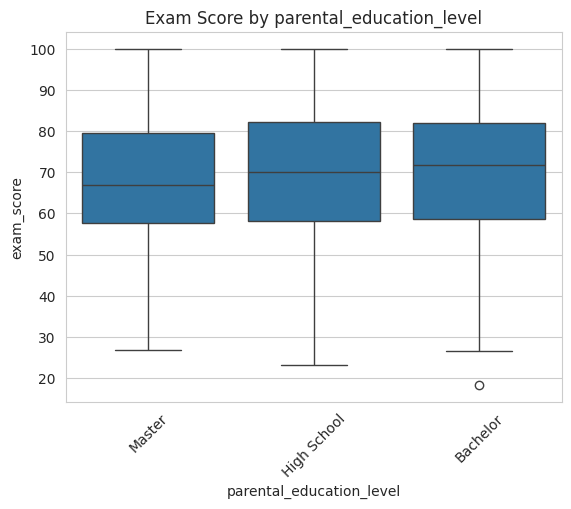

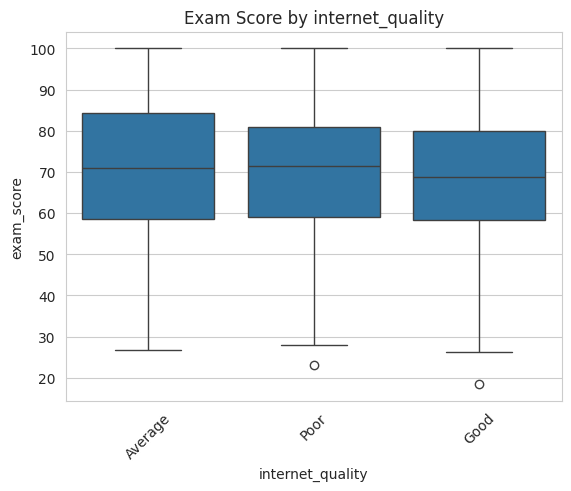

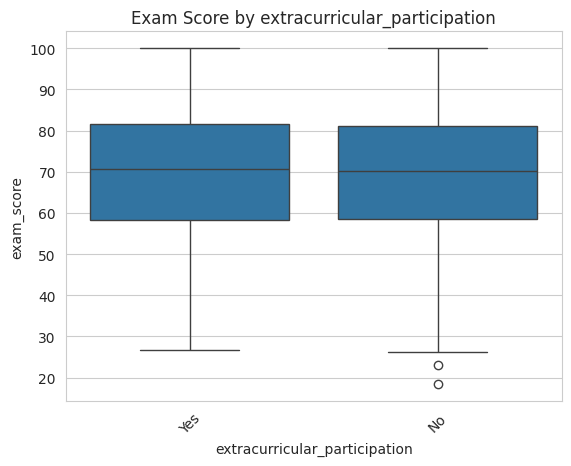

In [22]:
for col in categorical_cols:
  sns.boxplot(data = df, x = col, y = "exam_score")
  plt.title(f"Exam Score by {col}")
  plt.xticks(rotation = 45)
  plt.show()

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [24]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [25]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [26]:
features = ["study_hours_per_day", 'attendance_percentage', 'mental_health_rating', 'sleep_hours', 'part_time_job']

In [27]:
target= "exam_score"

In [28]:
df_model = df[features + [target]].copy()

In [29]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [30]:
le = LabelEncoder()

In [31]:
df_model["part_time_job"] = le.fit_transform(df_model["part_time_job"])

In [32]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [33]:
X = df_model[features]

In [34]:
y = df_model[target]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
len(y_test)

182

In [37]:
len(y_train)

727

In [38]:
models = {
    "LinearRegression" : {
        "model" : LinearRegression(),
        "params" : {}
    },
    "DecisionTree" : {
        "model" : DecisionTreeRegressor(),
        "params" : {"max_depth": [3,5,10], "min_samples_split": [2,5]}
    },
    "RandomForest" : {
        "model" : RandomForestRegressor(),
        "params" : {"n_estimators": [50,100], "max_depth": [5,10]}
    }
}

In [39]:
best_models = []

In [40]:
for name, config in models.items():
  print(f"Training {name}")

  grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_squared_error")
  grid.fit(X_train, y_train)

  y_pred = grid.predict(X_test)
  rmse= np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  best_models.append({
      "model":name,
      "best_params": grid.best_params_,
      "rmse": rmse,
      "r2": r2
  })

Training LinearRegression
Training DecisionTree
Training RandomForest


In [41]:
best_models

[{'model': 'LinearRegression',
  'best_params': {},
  'rmse': np.float64(6.604266496585712),
  'r2': 0.8269268415234645},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 5, 'min_samples_split': 2},
  'rmse': np.float64(8.007122085502846),
  'r2': 0.7455904319539843},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 10, 'n_estimators': 100},
  'rmse': np.float64(6.887272489167312),
  'r2': 0.8117759682946253}]

In [42]:
results_df = pd.DataFrame(best_models)

In [43]:
results_df.sort_values(by="rmse")

,model,best_params,rmse,r2
0,LinearRegression,{},6.604266,0.826927
2,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",6.887272,0.811776
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.007122,0.745590


In [44]:
import joblib
best_row = results_df.sort_values(by="rmse").iloc[0]
best_row

,0
model,LinearRegression
best_params,{}
rmse,6.604266
r2,0.826927


In [45]:
best_model_name = best_row["model"]

In [46]:
best_model_config = models[best_model_name]

In [47]:
best_model_config

{'model': LinearRegression(), 'params': {}}

In [48]:
final_model = best_model_config["model"]

In [49]:
final_model.fit(X,y)

LinearRegression()

In [50]:
joblib.dump(final_model, "best_model.pkl")

['best_model.pkl']

In [51]:
joblib.load("best_model.pkl").predict(X_test)

array([ 60.29610803,  83.16135013,  88.43006865,  81.1148883 ,
        86.71282094,  48.21064224,  55.57788334,  86.53513622,
       116.48483776,  48.67726609,  77.09472949,  59.86149389,
        55.18712999,  53.93516025,  76.36598796,  50.15515284,
        57.44126378,  44.81898792,  85.7737938 ,  70.71589384,
        71.57182983,  80.46322951,  68.37208385,  90.68772396,
        54.26161987,  65.9872718 ,  56.00371918,  57.63384029,
        77.45864808,  65.10743322,  57.98993937,  66.72764266,
        68.66172969,  78.4898864 ,  69.37049503,  94.26716699,
        69.0659914 ,  79.36878895,  76.11212812,  66.42058582,
        63.08783432,  86.19114402,  76.23992153,  78.30936564,
        93.21245749,  58.56807717,  68.93258247,  68.10932257,
        98.07031515,  58.44760136,  73.26225406,  66.16326409,
        67.77673736,  62.33964812,  74.47177811,  74.53698275,
        50.4895758 ,  82.66920556,  56.4052808 ,  40.74930647,
        53.00815757,  47.52966995,  84.71786767,  68.29

In [52]:
!pip install streamlit
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [53]:
%%writefile app.py
import streamlit as st
import joblib
import warnings
warnings.filterwarnings("ignore")
model = joblib.load("best_model.pkl")
st.title("Student Exam Score Prediction")
study_hours = st.slider("Study Hours per Day", 0.0, 12.0, 2.0)
attendance = st.slider("Attendance Percentage", 0.0, 100.0, 80.0)
mental_health = st.slider("Mental Health Rating(1-10)", 1, 10, 5)
sleep_hours = st.slider("Sleep Hours per Night", 0.0, 12.0, 7.0)
part_time_job = st.selectbox("Part-time Job", ["Yes", "No"])

ptj_encoded = 1 if part_time_job == "Yes" else 0
if st.button("Predict Exam Score"):
  input_data = np.array([[study_hours, attendance, mental_health, sleep_hours, ptj_encoded]])
  prediction = model.predict(input_data)[0]
  prediction = max(0, min(100,prediction))
  st.success(f"Predicted Exam Score: {prediction:.2f}")

Writing app.py
